In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

# Q1
Delivery_time -> Predict delivery time using sorting time 

In [2]:
data = pd.read_csv("delivery_time.csv")
data.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.corr()


,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

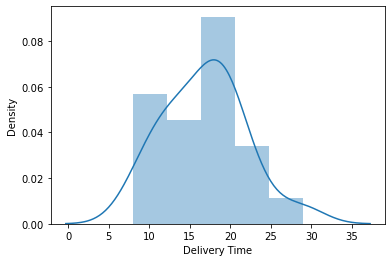

In [5]:
sns.distplot(data['Delivery Time'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

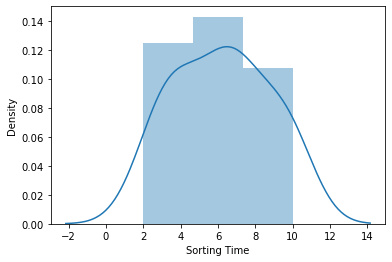

In [6]:
sns.distplot(data['Sorting Time'])


Text(0, 0.5, 'ST')

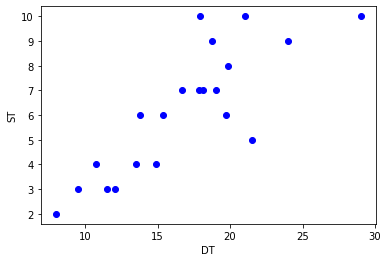

In [7]:
import matplotlib.pyplot as plt
plt.plot(data['Delivery Time'], data['Sorting Time'],"bo");plt.xlabel("DT");plt.ylabel("ST")

In [8]:
data['Delivery Time'].corr(data['Delivery Time']) # # correlation value between X and Y
np.corrcoef(data['Delivery Time'], data['Sorting Time'])

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [9]:
##Renaming columns
data.columns = ['DT', 'ST']
data


,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:>

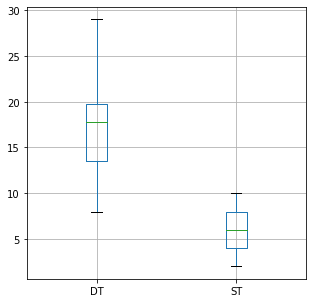

In [10]:
data.boxplot(figsize=(5,5))

In [36]:
data['DT']=pd.to_numeric(data['DT'],errors='coerce')
data['ST']=pd.to_numeric(data['ST'],errors='coerce')  ###coerce will introduce NA valuefor non numeric data in columns
data['DT']=data['ST'].astype('category')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DT      21 non-null     category
 1   ST      21 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 689.0 bytes


In [11]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST", data=data).fit()

# Feature Engineering

In [12]:
data.corr()


,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<AxesSubplot:xlabel='ST', ylabel='DT'>

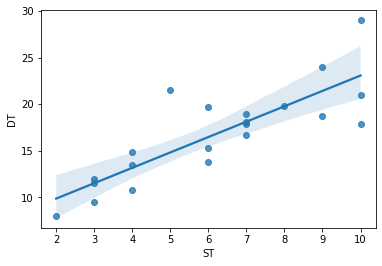

In [13]:
sns.regplot(x=data['ST'],y=data['DT'])


# Model Building

In [14]:
model=smf.ols("DT~ST",data=data).fit()


# Model Testing

In [15]:
# Finding Coefficient parameters
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [16]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [17]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions


In [18]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [19]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [20]:
data_pred=pd.DataFrame(new_data,columns=['ST'])
data_pred

,ST
0,5
1,8


In [21]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Q2
Salary_hike -> Build a prediction model for Salary_hike


In [22]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# EDA and Data Visualization


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [42]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

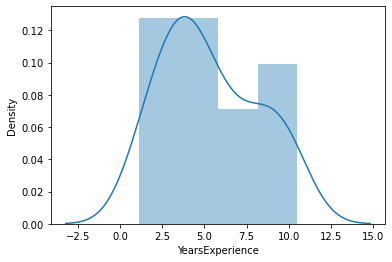

In [44]:
sns.distplot(dataset['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

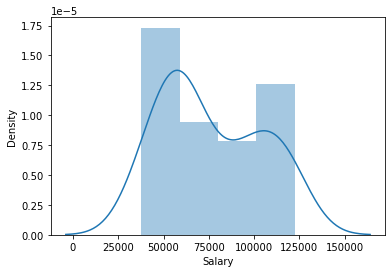

In [45]:
sns.distplot(dataset['Salary'])

Text(0, 0.5, 'Salary')

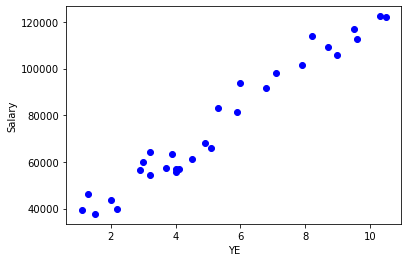

In [47]:
import matplotlib.pyplot as plt
plt.plot(dataset['YearsExperience'], dataset['Salary'],"bo");plt.xlabel("YE");plt.ylabel("Salary")

In [48]:
dataset['YearsExperience'].corr(dataset['YearsExperience']) # # correlation value between X and Y
np.corrcoef(dataset['YearsExperience'], dataset['Salary'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

<AxesSubplot:>

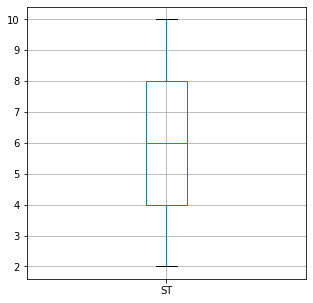

In [49]:
data.boxplot(figsize=(5,5))

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

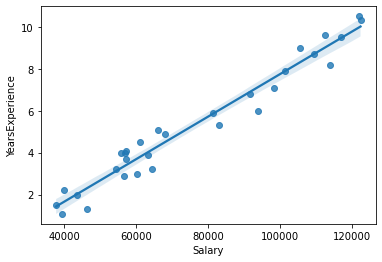

In [50]:
sns.regplot(x=dataset['Salary'],y=dataset['YearsExperience'])


In [51]:
model=smf.ols("YearsExperience~Salary",data=dataset).fit()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

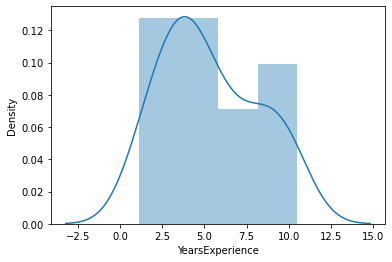

In [24]:
sns.distplot(dataset['YearsExperience'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

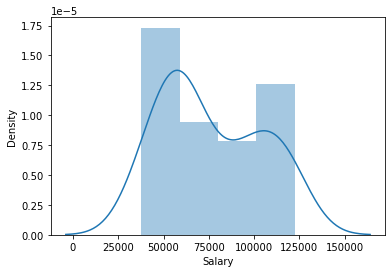

In [25]:
sns.distplot(dataset['Salary'])


In [26]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

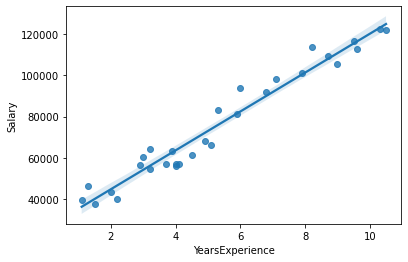

In [27]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])


# Model Building


In [56]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()
print(model)

# Model Testing

In [29]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [30]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [31]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Predictions

In [32]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [33]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [34]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [35]:
model.predict(data_pred)


0    54142.087163
1    73042.011806
dtype: float64